## Prerequisites
You’ll need to know a bit of Python & numpy module. For a refresher, see the [Python tutorial](https://docs.python.org/3/tutorial/), [Numpy tutorial](https://numpy.org/devdocs/user/quickstart.html).

Basic `GIS(Geographic Information System)` knowledge is needed such as raster datatype, vector datatype, geotransform, CRS(Coordinate Reference System) and projections, etc.

In [1]:
import os
import numpy as np

try:
    os.mkdir("temp_output")
except:
    pass

## **TronGisPy.Raster** Object
TronGisPy's main object is the Raster object. It is a grid type data with geographic information, such as geotransform, coordinate systems etc.

For example, loading a dem `GeoTiff` data as a Raster object and get the geographic information.

In [2]:
import TronGisPy as tgp
dem_fp = tgp.get_testing_fp("dem_process_path")
dem_rst = tgp.read_raster(dem_fp)
dem_rst

shape: (538, 513, 1)
gdaldtype: GDT_Float32
geo_transform: (292210.0, 20.0, 0.0, 2740290.0, 0.0, -20.0)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
no_data_value: -999.0
metadata: {'AREA_OR_POINT': 'Area'}

When we print the Raster object it will return basic geographic information from your grid data. We can call the specific attribute to access the geographic infomation and data.

In [3]:
# can get the shape of grid data (rows, cols, bands)
dem_rst.shape

(538, 513, 1)

In [4]:
# get the grid element data type in GDAL format
dem_rst.gdaldtype_name

'GDT_Float32'

In [5]:
# get raster data geotransform (top left x, w-e pixel resolution, rotation, top left y, rotation, n-s pixel resolution)
dem_rst.geo_transform

(292210.0, 20.0, 0.0, 2740290.0, 0.0, -20.0)

In [6]:
# get raster geographic projection information
dem_rst.projection

'PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [7]:
# get raster data's no data value
dem_rst.no_data_value

-999.0

In [8]:
# get raster data boundary coordinates (left top, right top, right bottom, left bottom)
dem_rst.extent

array([[ 292210., 2740290.],
       [ 302470., 2740290.],
       [ 302470., 2729530.],
       [ 292210., 2729530.]])

You can quickly show the raster data with `plot()` method. It will return a figure with the bands which you selected. And `hist()` method will return a stochastic histogram with the bands which you selected.

1


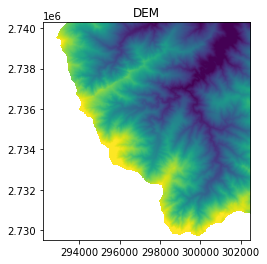

In [9]:
print(dem_rst.bands)
dem_rst.plot(bands=[0], title="DEM")

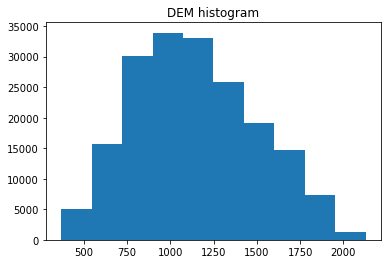

In [10]:
dem_rst.hist(bands=[0], title="DEM histogram")

We can extract the data in raster object as numpy array object.

In [11]:
dem_arr = dem_rst.data
print("Type of dem_arr : ", type(dem_arr))
print("Shape of dem_arr : ", dem_arr.shape)
dem_arr[:3, -3:, 0]

Type of dem_arr :  <class 'numpy.ndarray'>
Shape of dem_arr :  (538, 513, 1)


array([[560.16, 549.21, 533.44],
       [559.52, 548.35, 537.02],
       [574.99, 565.35, 550.65]], dtype=float32)

If you wnat to get specific value in raster data with `index` not coordinate. For example, we want to know the right top evaluation value in our dem raster data.

In [12]:
dem_arr[0, -1, 0]

533.44

If you wnat to get specific value in raster data with `coordinate` not index. For example, we want to know the evaluation values in our dem raster data at (298000., 2735000.) and (302460., 2740280.).

In [13]:
dem_rst.get_values_by_coords(np.array([[298000., 2735000.], [302460., 2740280.]]))

array([[1003.83],
       [ 533.44]], dtype=float32)

We can assign new numpy array to Raster.data and saved as a new raster data with `to_file` method.

In [14]:
orig_dem_arr = dem_rst.data
# fill numpy nan to no_data_value
orig_dem_arr = np.where(orig_dem_arr==dem_rst.no_data_value, np.nan, orig_dem_arr) 
# filter data by 800 meter evaluation to bool values
new_dem_arr = np.where(orig_dem_arr<800, 0, 1) 
# fill no_data_value to np.nan
new_dem_arr = np.where(np.isnan(orig_dem_arr), dem_rst.no_data_value, new_dem_arr) 
# assign new array to Raster.data
dem_rst.data = new_dem_arr
dem_rst.astype(int)
print(dem_rst.gdaldtype_name)

dem_rst.to_file("temp_output/dem_800m_filter.tif")

GDT_Int32


Now, we can load the new raster data `dem_800m_filter.tif` as a Raster object.

In [15]:
dem_800m_rst = tgp.read_raster("temp_output/dem_800m_filter.tif")
dem_800m_rst

shape: (538, 513, 1)
gdaldtype: GDT_Int32
geo_transform: (292210.0, 20.0, 0.0, 2740290.0, 0.0, -20.0)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
no_data_value: -999.0
metadata: {'AREA_OR_POINT': 'Area'}

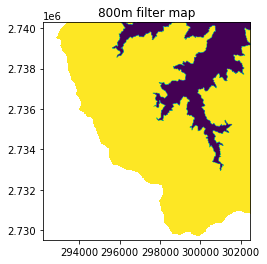

In [16]:
dem_800m_rst.plot(title="800m filter map")

`reproject` method to reproject the raster data by [EPSG](https://epsg.org/home.html) code.

In [17]:
dem_fp = tgp.get_testing_fp("dem_process_path")
dem_rst = tgp.read_raster(dem_fp)
dem_rst.projection

'PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

The original projection of `dem_rst` is `TWD97 / TM2 zone 121 => EPSG:3826`. If you want to reproject the dem raster data from `TWD97 / TM2 zone 121 => EPSG:3826` to `WGS84 => EPSG:4326`:

In [18]:
dem_rst_wgs84 = dem_rst.reproject(dst_crs='EPSG:4326')
dem_rst_wgs84.projection

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

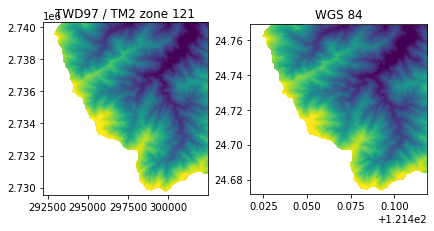

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
ax1 = plt.subplot(121)
dem_rst.plot(ax=ax1, title=f'{dem_rst.projection[8:28]}')
ax2 = plt.subplot(122)
dem_rst_wgs84.plot(ax=ax2, title=f'{dem_rst_wgs84.projection[8:14]}')
plt.subplots_adjust(bottom=0.2, top=0.8)

The resolution of the raster data means the size of each pixel in grid.`refine_resolution` method can refine the resolution of raster data. Use resample_alg parameter to define the resample algorithm.

Original shape:  (538, 513, 1)
geo_transform:
(292210.0, 20.0, 0.0, 2740290.0, 0.0, -20.0)


Refine resolution shape:  (1076, 1026, 1)
geo_transform:
(292210.0, 10.0, 0.0, 2740290.0, 0.0, -10.0)


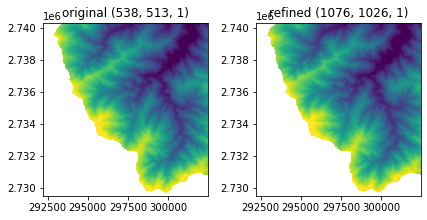

In [20]:
print("Original shape: ", dem_rst.shape)
print("geo_transform:")
print(dem_rst.geo_transform)

print("\n")
dem_res10_rst = dem_rst.refine_resolution(dst_resolution=10, resample_alg='bilinear')
print("Refine resolution shape: ", dem_res10_rst.shape)
print("geo_transform:")
print(dem_res10_rst.geo_transform)

plt.figure(figsize=(7, 4))
ax1 = plt.subplot(121)
dem_rst.plot(ax=ax1, title=f'original {dem_rst.shape}')
ax2 = plt.subplot(122)
dem_res10_rst.plot(ax=ax2, title=f'refined {dem_res10_rst.shape}')
plt.subplots_adjust(bottom=0.2, top=0.8)

## GeoCoding functions
TronGisPy `ShapGrid` module provies geographic operating between vector data and raster grid data.

Vector data uses points, lines, polygons, and multiple-polygons to describe geo-objects in terms of layers. We can use `ShapeGrid.vectorize_layer` function to convert raster data to vector data with polygons or multipolygon.

In [21]:
from TronGisPy import ShapeGrid

dem_vct = ShapeGrid.vectorize_layer(dem_rst, band_num=1, field_name='dem')
print(type(dem_vct))
dem_vct.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,dem,geometry
0,1602,"POLYGON ((293330.000 2740290.000, 293330.000 2..."
1,1598,"POLYGON ((293350.000 2740290.000, 293350.000 2..."
2,1589,"POLYGON ((293370.000 2740290.000, 293370.000 2..."
3,1576,"POLYGON ((293390.000 2740290.000, 293390.000 2..."
4,1568,"POLYGON ((293410.000 2740290.000, 293410.000 2..."


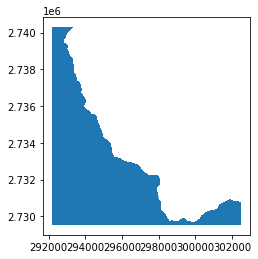

In [22]:
# save vector data in shapefile format
dem_vct.to_file('temp_output/dem_poly.shp')
dem_vct[dem_vct["dem"] < 0].plot()

`ShapeGrid.vectorize_layer` will return a `Geopandas.GeoDataFrame` vectorized result. Each pixel in raster data converted to one row in `GeoDataFrame`. For more detail about [Geopandas](https://geopandas.org/).

`ShapeGrid.rasterize_layer` function provides to convert a `Geopandas.GeoDataFrame` instance to raster data.

In [23]:
import geopandas as gpd

src_vector = gpd.read_file('temp_output/dem_poly.shp') # load shapefile to GeoDataFrame
src_vector.head()

,dem,geometry
0,1602,"POLYGON ((293330.000 2740290.000, 293350.000 2..."
1,1598,"POLYGON ((293350.000 2740290.000, 293370.000 2..."
2,1589,"POLYGON ((293370.000 2740290.000, 293390.000 2..."
3,1576,"POLYGON ((293390.000 2740290.000, 293410.000 2..."
4,1568,"POLYGON ((293410.000 2740290.000, 293430.000 2..."


In [24]:
# generate raw, col, and geo_transform from vector data
rows, cols, geo_transform = ShapeGrid.get_rasterize_layer_params(src_vector, res=20) 
raster = ShapeGrid.rasterize_layer(src_vector, rows, cols, geo_transform, use_attribute='dem', no_data_value=-999)
raster

cannot find compatible gdaldtype for np.int64, use gdal.GDT_Int32 as alternative.


shape: (538, 513, 1)
gdaldtype: GDT_Int32
geo_transform: (292210.0, 20, 0, 2740290.0, 0, -20)
projection: PROJCRS["TWD97 / TM2 zone 121",BASEGEOGCRS["TWD97",DATUM["Taiwan Datum 1997",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",3824]],CONVERSION["Taiwan 2-degree TM zone 121",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",121,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9999,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",250000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting (X)",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing (Y)",north,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["unknown"],AREA["

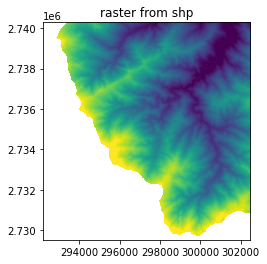

In [25]:
raster.plot(title='raster from shp')

`rasterize_layer_by_ref_raster` funtion can convert source vector data to raster data by ref raster data geographic information

In [26]:
raster = ShapeGrid.rasterize_layer_by_ref_raster(src_vector, dem_rst, use_attribute='dem', no_data_value=-999)
raster

cannot find compatible gdaldtype for np.int64, use gdal.GDT_Int32 as alternative.


shape: (538, 513, 1)
gdaldtype: GDT_Int32
geo_transform: (292210.0, 20.0, 0.0, 2740290.0, 0.0, -20.0)
projection: PROJCRS["TWD97 / TM2 zone 121",BASEGEOGCRS["TWD97",DATUM["Taiwan Datum 1997",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",3824]],CONVERSION["Taiwan 2-degree TM zone 121",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",121,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9999,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",250000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting (X)",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing (Y)",north,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["unknown"

`ShapeGrid.clip_raster_with_extent` function can clip the raster data with specific extent with (xmin, ymin, xmax, ymax) format.

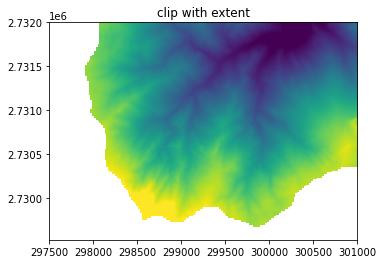

In [27]:
ext = xmin, ymin, xmax, ymax = [297500., 2729530., 301000., 2732000.]
dst_raster = ShapeGrid.clip_raster_with_extent(dem_rst, ext)
dst_raster.plot(title="clip with extent")

You can clip raster data not only by specific extent but also by a vector data with polygons or multipolygon.

In [28]:
from shapely.geometry import Polygon

polys = [Polygon([(294000., 2740000.), (296000., 2740000.), (297000., 2739000.), (297000., 2737000.), (296000., 2736000.), (294000., 2736000.)]), 
         Polygon([(297500., 2730000.), (297500., 2732000.), (300000., 2732000.), (300000., 2730000.)])]
poly_vct = gpd.GeoDataFrame(crs='epsg:3826', geometry=polys) # create a GeoDataframe with 2 polygons
poly_vct.head()

,geometry
0,"POLYGON ((294000.000 2740000.000, 296000.000 2..."
1,"POLYGON ((297500.000 2730000.000, 297500.000 2..."


In [29]:
dst_raster = ShapeGrid.clip_raster_with_polygon(dem_rst, poly_vct, no_data_value=-999)
dst_raster

cannot find compatible gdaldtype for np.int64, use gdal.GDT_Int32 as alternative.


shape: (500, 300, 1)
gdaldtype: GDT_Float32
geo_transform: (294010.0, 20.0, 0.0, 2740010.0, 0.0, -20.0)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
no_data_value: -999.0
metadata: {'AREA_OR_POINT': 'Area'}

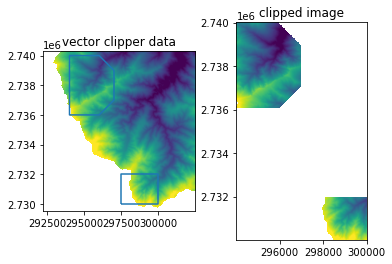

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
dem_rst.plot(ax=ax1)
poly_vct.boundary.plot(ax=ax1)
ax1.set_title('vector clipper data')
dst_raster.plot(ax=ax2)
ax2.set_title('clipped image')
plt.show()

## DEM procssing algorithm
DEM(digital elevation model) is used often in geographic information systems, and is the most common basis for digitally produced relief maps. `TronGisPy.DEMProcessor` module provides common algorithms to analyze DEM geographic data.

`DEMProcessor.dem_to_hillshade` converts DEM raster data to hillshade data for terrain visualization.

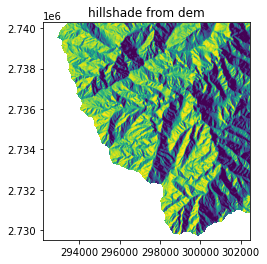

In [31]:
from TronGisPy import DEMProcessor

dem_fp = tgp.get_testing_fp("dem_process_path")
dem_rst = tgp.read_raster(dem_fp)
hillshade = DEMProcessor.dem_to_hillshade(dem_rst, azimuth=90, altitude=30)
hillshade.plot(title="hillshade from dem")

`DEMProcessor.dem_to_slope` converts DEM raster data to slope data. `slope_format` parameter decides return slope value with degree or percentage format.

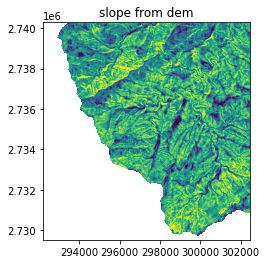

In [32]:
slope = DEMProcessor.dem_to_slope(dem_rst, slope_format='degree') # percent
slope.plot(title="slope from dem")

`DEMProcessor.dem_to_aspect` converts DEM raster data to aspect data. `trigonometric` parameter decides whether to return trigonometric angle instead of azimuth, default `False`.

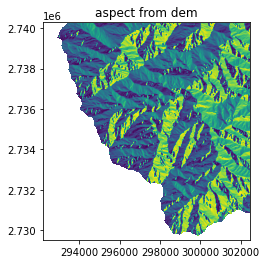

In [33]:
aspect = DEMProcessor.dem_to_aspect(dem_rst)
aspect.plot(title="aspect from dem")

`DEMProcessor.dem_to_TRI` calculate the terrain ruggedness index (TRI) from DEM data.

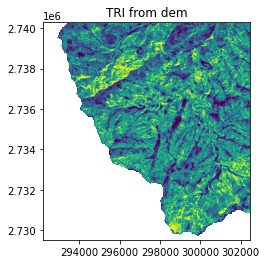

In [34]:
TRI = DEMProcessor.dem_to_TRI(dem_rst)
TRI.plot(title="TRI from dem")

`DEMProcessor.dem_to_TPI` calculate the topographic position index (TPI) from DEM data.

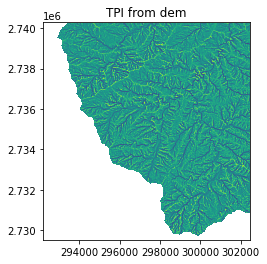

In [35]:
TPI = DEMProcessor.dem_to_TPI(dem_rst)
TPI.plot(title="TPI from dem")

`DEMProcessor.dem_to_roughness` calculate the roughness from DEM data.

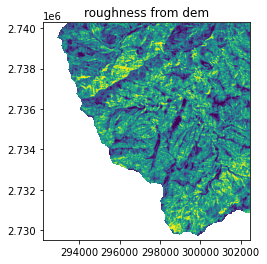

In [36]:
roughness = DEMProcessor.dem_to_roughness(dem_rst)
roughness.plot(title="roughness from dem")

## Split image for data preprocessing
`TronGisPy.SplittedImage` module provides splitting big remote sensing images into tiny pieces for AI training purpose. `SplittedImage` supports not only images splitting, but also combination of predicted results on the splitted images.

For example, we can read a satellite tif file as a `Raster` object and use `SplittedImage` module to do some analysis. Firt, we read the tif file as a `Raster` object and plot each band of the satellite image.

In [37]:
raster = tgp.read_raster(tgp.get_testing_fp())
raster

shape: (677, 674, 3)
gdaldtype: GDT_Int16
geo_transform: (271982.8783, 1.1186219584569888, 0.0, 2769973.0653, 0.0, -1.1186305760705852)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","3824"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3826"]]
no_data_value: -32768.0
metadata: {'AREA_OR_POINT': 'Area'}

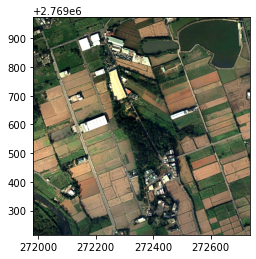

In [38]:
raster.plot()

We can use `SplittedImage` module to split `raster` into several pieces which size are (200, 200) and moving step are 100.

In [39]:
box_size, step_size = 200, 100
splitted_image = tgp.SplittedImage(raster, box_size, step_size=step_size)
splitted_image

window_size: (200, 200)
step_size: (100, 100)
pad_val: 0
src_raster: 
 	shape: (677, 674, 3)
	gdaldtype: GDT_Int16
	geo_transform: (271982.8783, 1.1186219584569888, 0.0, 2769973.0653, 0.0, -1.1186305760705852)
	projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","3824"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3826"]]
	no_data_value: -32768.0
	metadata: {'AREA_OR_POINT': 'Area'}

In [40]:
# the source image can be splited to (6 ,6) pieces with box_size=200, step_size=100
splitted_image.shape

(6, 6)

In [41]:
splitted_image.n_splitted_images

36

We can access the specific piece by `index` and it will return a `Raster` object.

In [42]:
first_pcs = splitted_image[0, 0]
first_pcs

shape: (200, 200, 3)
gdaldtype: GDT_Int16
geo_transform: (271982.8783, 1.1186219584569888, 0.0, 2769973.0653, 0.0, -1.1186305760705852)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","3824"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3826"]]
no_data_value: -32768.0
metadata: None

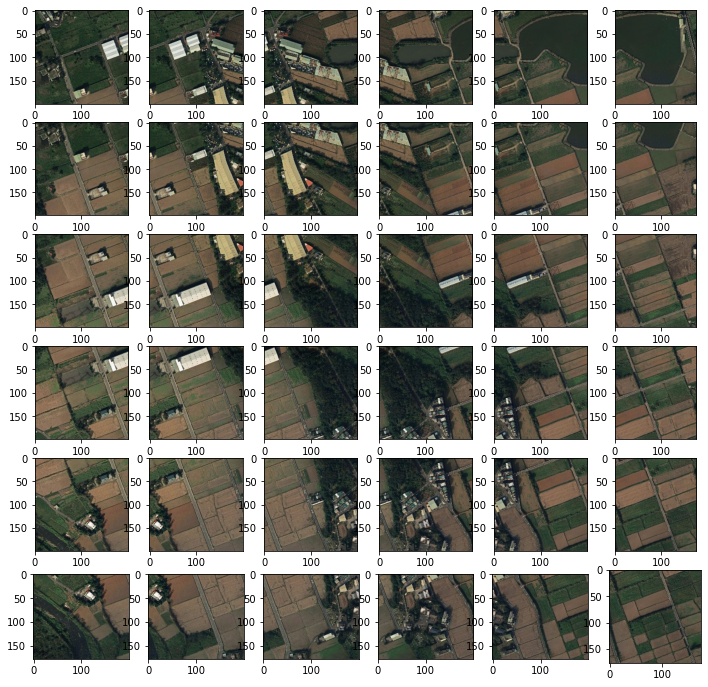

In [43]:
# plot all pieces
fig, axes = plt.subplots(*splitted_image.shape, figsize=(12, 12))
for i in range(splitted_image.shape[0]):
    for j in range(splitted_image.shape[1]):
        x = splitted_image[i,j].data
        axes[i][j].imshow(x)
plt.show()

`get_splitted_images` method will return all pieces of splitted data in `numpy.ndarray` type.

In [44]:
all_pcs = splitted_image.get_splitted_images()
print(all_pcs.shape)
print(type(all_pcs))

(36, 200, 200, 3)
<class 'numpy.ndarray'>


`get_geo_attribute` method will return a `geopandas.GeoDataFrame` with some geo_attributes such as (idx, idx_h, idx_w, geo_transform, geometry) of all splitted images.

In [45]:
geo_attribute = splitted_image.get_geo_attribute()
geo_attribute.head()

,idx,idx_h,idx_w,geometry
0,0,0,0,"POLYGON ((271982.878 2769973.065, 272206.603 2..."
1,1,0,1,"POLYGON ((272094.740 2769973.065, 272318.465 2..."
2,2,0,2,"POLYGON ((272206.603 2769973.065, 272430.327 2..."
3,3,0,3,"POLYGON ((272318.465 2769973.065, 272542.189 2..."
4,4,0,4,"POLYGON ((272430.327 2769973.065, 272654.051 2..."


`write_splitted_images` method will write all splitted images as tif file.

In [46]:
# it will save each splitted imgs in target_dir as filename_[idx]_[idx_h]_[idx_w].tif
splitted_image.write_splitted_images("temp_output", "filename") 
first_pcs = tgp.read_raster("temp_output/filename_000_000_000.tif")
first_pcs

shape: (200, 200, 3)
gdaldtype: GDT_Int16
geo_transform: (271982.8783, 1.1186219584569888, 0.0, 2769973.0653, 0.0, -1.1186305760705852)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","3824"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3826"]]
no_data_value: -32768.0
metadata: {'AREA_OR_POINT': 'Area'}

`write_combined_tif` method will combine the `numpy.ndarray` which has the same shape with the `SplittedImage.get_splitted_images` and write as a tif file.

In [47]:
# create a random value numpy array which has same shape with splitted_image.get_splitted_images()
new_array = np.random.randint(0, 255, size=splitted_image.get_splitted_images().shape)
new_array.shape

(36, 200, 200, 3)

In [48]:
splitted_image.write_combined_tif(new_array, "temp_output/rand_comb.tif") # write new_array as tiff file
new_array = tgp.read_raster("temp_output/rand_comb.tif")
new_array

shape: (677, 674, 3)
gdaldtype: GDT_Int16
geo_transform: (271982.8783, 1.1186219584569888, 0.0, 2769973.0653, 0.0, -1.1186305760705852)
projection: PROJCS["TWD97 / TM2 zone 121",GEOGCS["TWD97",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","3824"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",121],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",250000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3826"]]
no_data_value: -32768.0
metadata: {'AREA_OR_POINT': 'Area'}

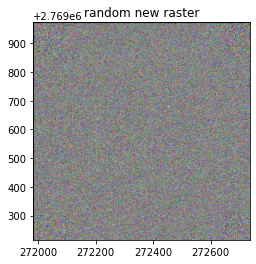

In [49]:
new_array.plot(title="random new raster")

## Raster Interpolation
Sometimes, we will deal with some data has missing values in data preprocessing stage. In general, we fills specific values (such as mean of data, majority of data, etc) for the missing data. `TronGisPy.Interpolation` module provides useful algorithm for filling missing values with `Raster` data.

`img_interpolation` function can interpolate missing values of the image data by `scipy.interpolate.griddata` engine.

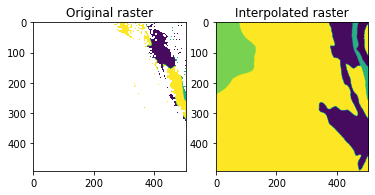

In [50]:
from TronGisPy import Interpolation

raster_fp = tgp.get_testing_fp('tif_forinterpolation')
raster = tgp.read_raster(raster_fp)
data_interp = Interpolation.img_interpolation(raster.data)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Original raster')
ax1.imshow(raster.data[:, :, 0])
ax2.set_title('Interpolated raster')
ax2.imshow(data_interp[:, :, 0])
plt.show()

`majority_interpolation` function can interpolate missing values of the image data by majority value in specify-size window.

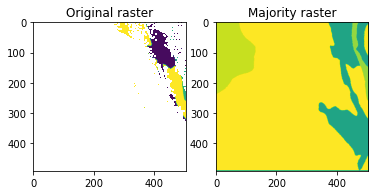

In [51]:
data = raster.data.copy()[:, :, 0]
data[np.isnan(data)] = raster.no_data_value
data = data.astype(np.int) # majority_interpolation need data in int type
data_interp = Interpolation.majority_interpolation(data, no_data_value=raster.no_data_value, window_size=3)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Original raster')
ax1.imshow(raster.data[:, :, 0])
ax2.set_title('Majority raster')
ax2.imshow(data_interp)
plt.show()

`mean_interpolation` function can interpolate missing values of the image data by mean value in specify-size window.

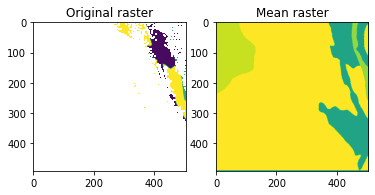

In [52]:
data = raster.data.copy()[:, :, 0]
data[np.isnan(data)] = raster.no_data_value
data_interp = Interpolation.mean_interpolation(data, no_data_value=raster.no_data_value, window_size=3)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Original raster')
ax1.imshow(raster.data[:, :, 0])
ax2.set_title('Mean raster')
ax2.imshow(data_interp)
plt.show()

## Normalizer
Machine learning and deep learning workflow contain feature normalization(standardization) in the data preprocessing section. Feature normalization(standardization) improves the numerical stability of the traingin model and It may speed up the training process.

`TronGisPy.Normalizer` module provides min-max normalize function. It can normalize the digital values of the image into 0~1 range.

In [53]:
from TronGisPy import Normalizer

dem_fp = tgp.get_testing_fp("dem_process_path")
dem_rst = tgp.read_raster(dem_fp)
# set np.nan to dem_rst nmupy array where value is no_data_value
dem_rst.data[dem_rst.data[:, :, 0]==dem_rst.no_data_value] = np.nan
dem_rst.data

array([[[   nan],
        [   nan],
        [   nan],
        ...,
        [560.16],
        [549.21],
        [533.44]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [559.52],
        [548.35],
        [537.02]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [574.99],
        [565.35],
        [550.65]],

       ...,

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [   nan],
        [   nan],
        [   nan]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [   nan],
        [   nan],
        [   nan]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [   nan],
        [   nan],
        [   nan]]], dtype=float32)

In [54]:
norm = Normalizer()
dem_norm = norm.fit_transform(dem_rst.data)
dem_norm

array([[[       nan],
        [       nan],
        [       nan],
        ...,
        [0.10879312],
        [0.10257038],
        [0.09360847]],

       [[       nan],
        [       nan],
        [       nan],
        ...,
        [0.10842944],
        [0.10208163],
        [0.09564295]],

       [[       nan],
        [       nan],
        [       nan],
        ...,
        [0.11722084],
        [0.11174253],
        [0.10338872]],

       ...,

       [[       nan],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [       nan]]], dtype=float32)

In [55]:
np.nanmin(dem_norm), np.nanmax(dem_norm)

(0.0, 1.0)

`reverse_transform` method can reverse the normalization transform.

In [56]:
dem_reverse_norm = norm.reverse_transform(dem_norm)
dem_reverse_norm

array([[[   nan],
        [   nan],
        [   nan],
        ...,
        [560.16],
        [549.21],
        [533.44]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [559.52],
        [548.35],
        [537.02]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [574.99],
        [565.35],
        [550.65]],

       ...,

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [   nan],
        [   nan],
        [   nan]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [   nan],
        [   nan],
        [   nan]],

       [[   nan],
        [   nan],
        [   nan],
        ...,
        [   nan],
        [   nan],
        [   nan]]], dtype=float32)

In [57]:
# clean files
for root, dirs, files in os.walk("temp_output", topdown=False):
    for name in files:
        os.remove(os.path.join(root, name))
    for name in dirs:
        os.rmdir(os.path.join(root, name))
os.removedirs("temp_output")